# Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

#%config InlineBackend.figure_formats = {'pdf',}

%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [12]:
data = np.loadtxt('linear_regression_data1.txt', delimiter=',')
print data

X = np.c_[np.ones(data.shape[0]), data[:, 0]]
# print X
Y = np.c_[data[:,1]]
# print Y

[[  6.1101   17.592  ]
 [  5.5277    9.1302 ]
 [  8.5186   13.662  ]
 [  7.0032   11.854  ]
 [  5.8598    6.8233 ]
 [  8.3829   11.886  ]
 [  7.4764    4.3483 ]
 [  8.5781   12.     ]
 [  6.4862    6.5987 ]
 [  5.0546    3.8166 ]
 [  5.7107    3.2522 ]
 [ 14.164    15.505  ]
 [  5.734     3.1551 ]
 [  8.4084    7.2258 ]
 [  5.6407    0.71618]
 [  5.3794    3.5129 ]
 [  6.3654    5.3048 ]
 [  5.1301    0.56077]
 [  6.4296    3.6518 ]
 [  7.0708    5.3893 ]
 [  6.1891    3.1386 ]
 [ 20.27     21.767  ]
 [  5.4901    4.263  ]
 [  6.3261    5.1875 ]
 [  5.5649    3.0825 ]
 [ 18.945    22.638  ]
 [ 12.828    13.501  ]
 [ 10.957     7.0467 ]
 [ 13.176    14.692  ]
 [ 22.203    24.147  ]
 [  5.2524   -1.22   ]
 [  6.5894    5.9966 ]
 [  9.2482   12.134  ]
 [  5.8918    1.8495 ]
 [  8.2111    6.5426 ]
 [  7.9334    4.5623 ]
 [  8.0959    4.1164 ]
 [  5.6063    3.3928 ]
 [ 12.836    10.117  ]
 [  6.3534    5.4974 ]
 [  5.4069    0.55657]
 [  6.8825    3.9115 ]
 [ 11.708     5.3854 ]
 [  5.7737 

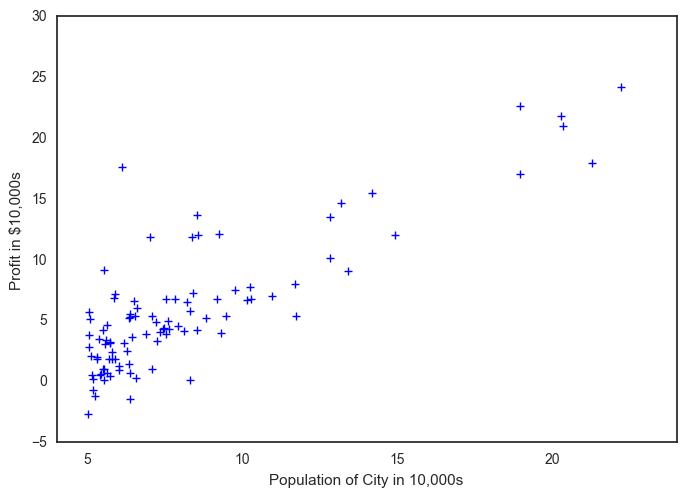

In [20]:
plt.scatter(X[:,1], y, s=30, c='b', marker='+', linewidth=1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

梯度下降

In [25]:
# 计算损失函数
def computeLoss(X, Y, theta=[[0],[0]]):
    m = Y.size
    J = 0
    H = X.dot(theta)
    
    J = 1.0/(2*m)*(np.sum(np.square(H-Y)))
    
    return J

In [26]:
computeLoss(X,Y)

32.072733877455676

In [30]:
# 梯度下降
def gradientDescent(X, Y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = Y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        H = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(H-Y))
        J_history[iter] = computeLoss(X,Y,theta)
        
    return (theta, J_history)

('theta: ', array([-3.63029144,  1.16636235]))


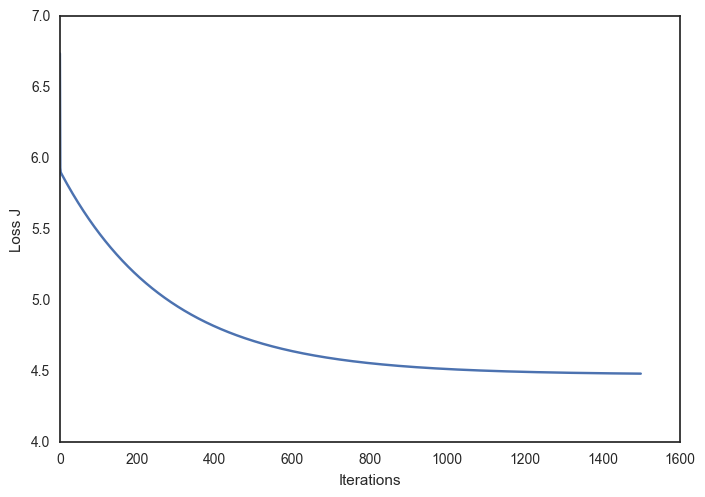

In [31]:
# 画出每一次迭代和损失函数变化
theta, Loss_J = gradientDescent(X,Y)
print('theta: ', theta.ravel())

plt.plot(Loss_J)
plt.ylabel('Loss J')
plt.xlabel('Iterations')

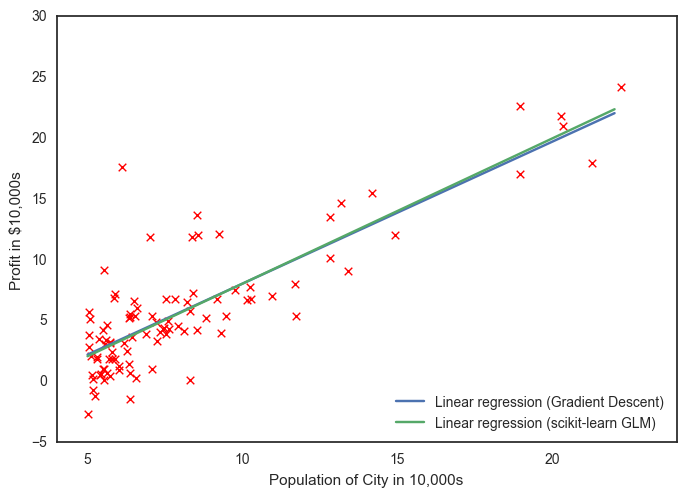

In [34]:
xx = np.arange(5,23)
yy = theta[0] + theta[1]*xx

plt.scatter(X[:,1], Y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label='Linear regression (Gradient Descent)')

regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4)
